## Q3
__NOTE__  

The clear formatted output of the requested values (# iterations, final (x,y) ) for each parameter (step-size, T, cooling coeff) can be found in __./Output__.  

The visual, simplified representation of the results is presented in this notebook for reference. The individual figures can be found under __./Figures__.
### A) Hill Climbling
First we will display the function we will work with along with the points at which we will perform Hill Climbing:

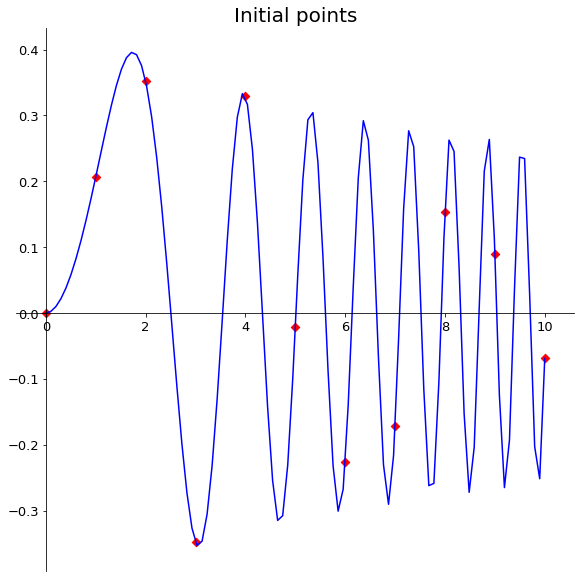

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

fig_counter  = 0
MIN_X, MAX_X = 0, 10

def increment_counter():
    global fig_counter
    fig_counter += 1
    return fig_counter

Y = lambda x: math.sin(math.pow(x, 2) / 2) / math.log((x + 4), 2)

def plot_model(x_axis, y_model, xs, es, title):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.rc('xtick',labelsize=13)
    plt.rc('ytick',labelsize=13)

    ax.plot(x_axis, y_model, 'b')
    ax.scatter(xs, es, marker='D', color='r')

    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position(('data',0))
    ax.spines['bottom'].set_position(('data',0))
    
    plt.title(title, fontsize=20)

    fig.savefig('./Figures/fig_{}.png'.format(increment_counter()))

    plt.show()

x_axis = np.linspace(MIN_X, MAX_X, 100)
y_model = [Y(x) for x in x_axis]

init_x = np.linspace(MIN_X, MAX_X, 11)
init_e = [Y(x) for x in init_x]

plot_model(x_axis, y_model, init_x, init_e, 'Initial points')


Now we will perform hill climbing for each of the initial states with step sizes $\in$ [0.01, 0.1]:


In [2]:
# given an initial state and a step size, 
# return the local max x, its energy and the number of iterations it took to reach
def hill_climbing(x_0, step):
    curr_x = x_0
    iterations = 0
    
    while True:
        iterations += 1
        left_x  = curr_x - step
        right_x = curr_x + step
    
        # only take into consideration points inside domain
        left_e  = Y(left_x) if left_x >= MIN_X else -float('inf')
        right_e = Y(right_x) if right_x <= MAX_X else -float('inf')
        
        max_x, max_e = (left_x, left_e) if left_e > right_e else (right_x, right_e)
        
        curr_e = Y(curr_x)
        if curr_e < max_e: 
            curr_x = max_x
        else:
            break
            
    return curr_x, curr_e, iterations


step_sizes = np.linspace(0.01,0.1,10)
avg_iters = []


with open('./Output/Q3a.txt', 'w') as f:
    for step in step_sizes:
        f.write('\n\n---- STEP SIZE: {:.2f} ----\n'.format(step))
        xs, es, iterations = [], [], []
        for x_0 in init_x:    
            x, e, i = hill_climbing(x_0, step)
            xs.append(x)
            es.append(e)
            iterations.append(i)
            f.write('Initial X = {:.0f}\tFinal (X,Y) = ({:.2f},{:.2f})\tIterations: {}\n'.format(x_0,x,e,i))
            
        avg_i = sum(iterations) / len(iterations)
        f.write('Average iterations to converge: {:.1f}\n'.format(avg_i))
        print('step size {:.2f} took in avg {:.1f} iterations to converge.'.format(step,avg_i))
        avg_iters.append(avg_i)

step size 0.01 took in avg 49.4 iterations to converge.
step size 0.02 took in avg 25.1 iterations to converge.
step size 0.03 took in avg 17.2 iterations to converge.
step size 0.04 took in avg 13.1 iterations to converge.
step size 0.05 took in avg 10.6 iterations to converge.
step size 0.06 took in avg 8.9 iterations to converge.
step size 0.07 took in avg 8.1 iterations to converge.
step size 0.08 took in avg 7.2 iterations to converge.
step size 0.09 took in avg 6.3 iterations to converge.
step size 0.10 took in avg 5.7 iterations to converge.


The local maximum points found are shown below:

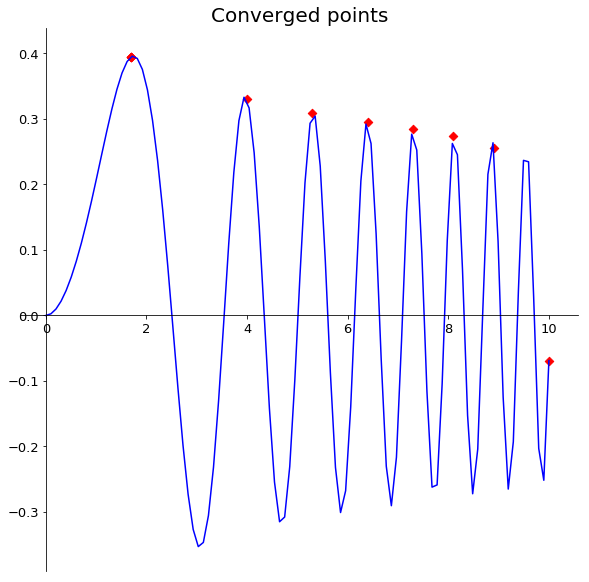

In [3]:
title = 'Converged points'
plot_model(x_axis, y_model, xs, es, title) 

The corresponding Y values found for each initial state can be found in the text file __./Output/Q3a.txt__

Next we plot how many iterations in average it took for each set of initial points to converge given different step sizes:

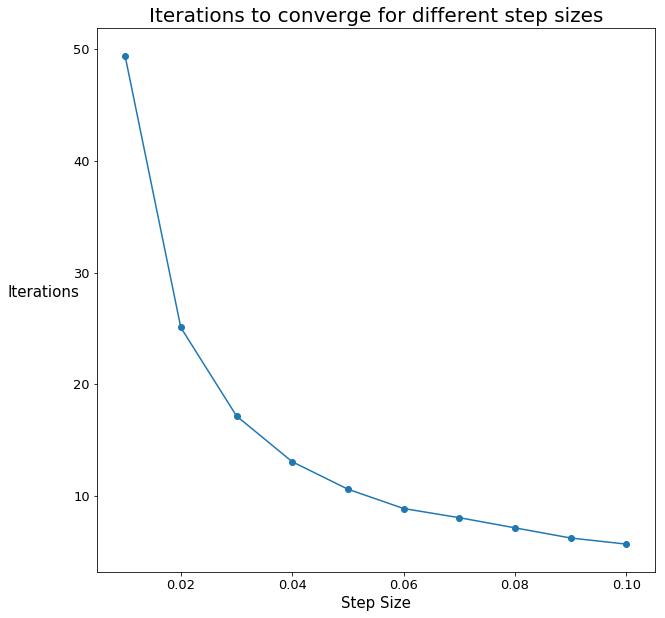

In [4]:
def plot_convergence(x, y, title, x_label, y_label):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(x, y)
    ax.scatter(x, y)
    plt.title(title, fontsize=20)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15, rotation=0, labelpad=30)

    fig.savefig('./Figures/fig_{}.png'.format(increment_counter()))
    if print:
        plt.show()

title = 'Iterations to converge for different step sizes'
x_label = 'Step Size'
y_label = 'Iterations'
plot_convergence(step_sizes, avg_iters, title, x_label, y_label)

Based on the above graph we see that a step size of 0.1 yield the minimal amount of iterations while still finding all the local maxima:

In [5]:
min_iters_idx = avg_iters.index(min(avg_iters))
optimal_step = step_sizes[min_iters_idx]
print('Optimal step size: {}'.format(optimal_step))

Optimal step size: 0.1


### B) Simulated Annealing
The corresponding Y values found for each initial Temperature and Cooling coefficient can be found in the text file __./Output/Q3b.txt__

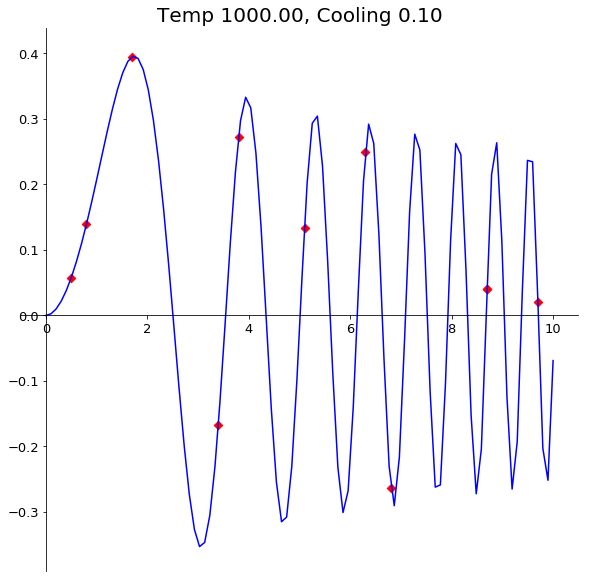

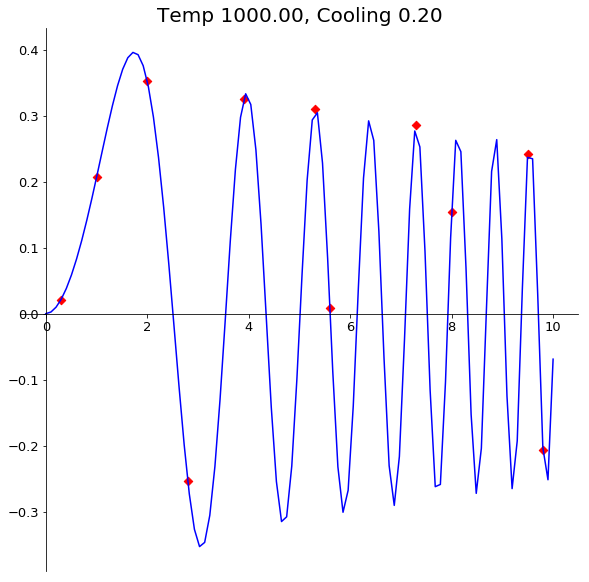

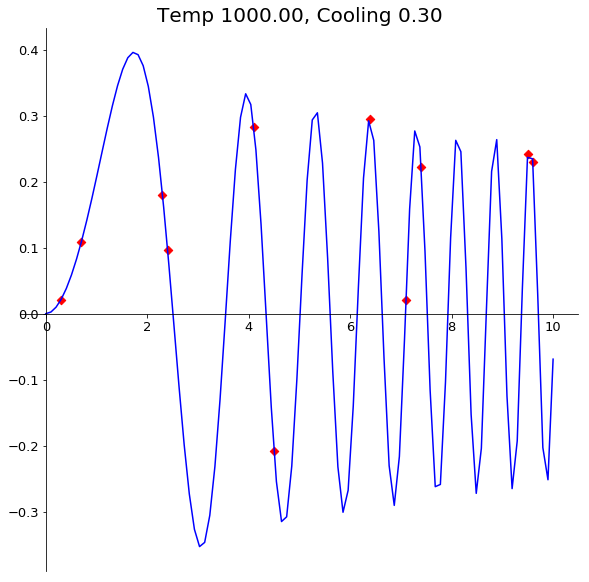

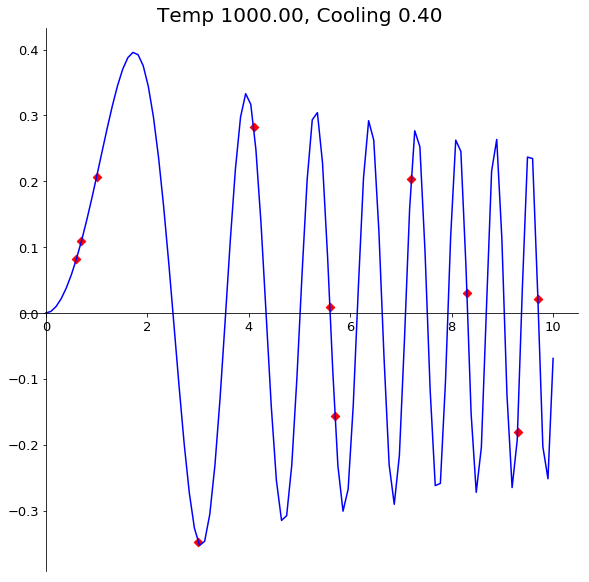

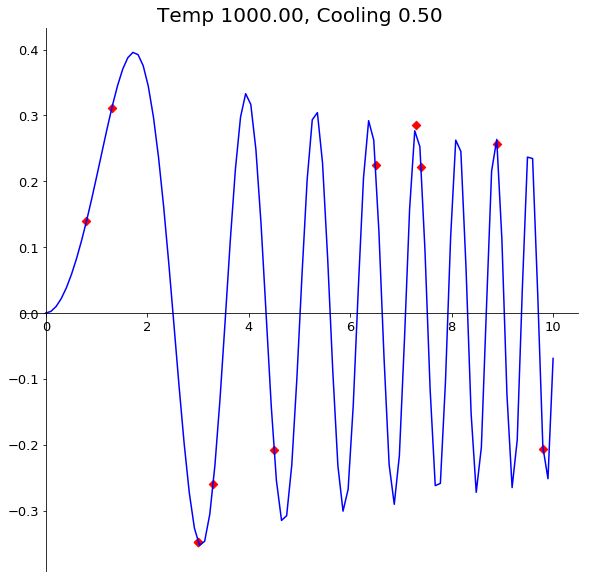

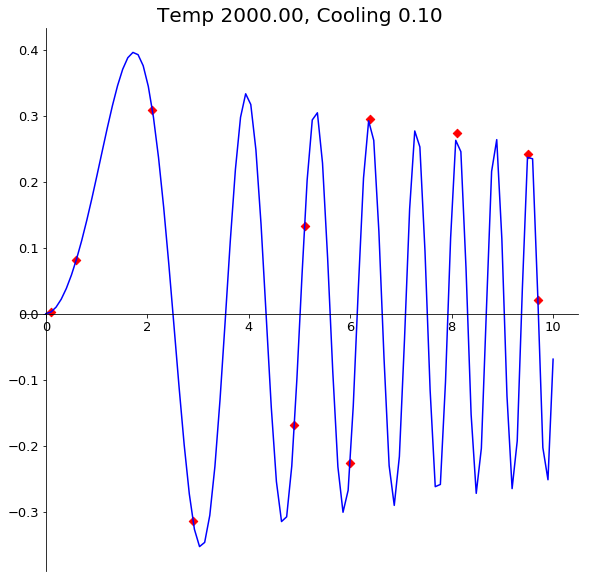

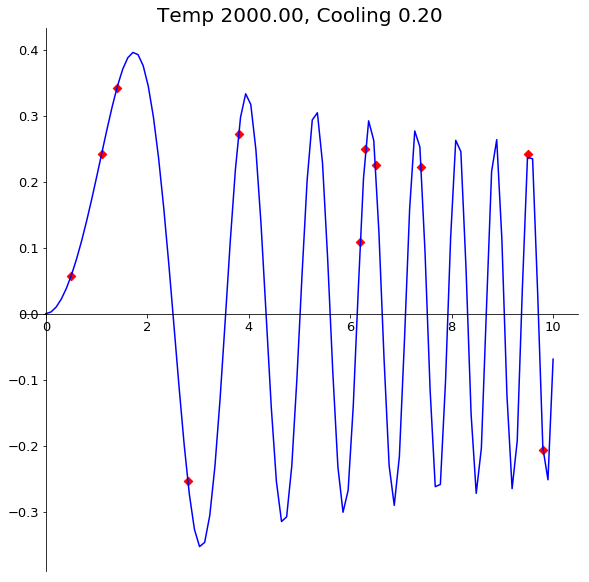

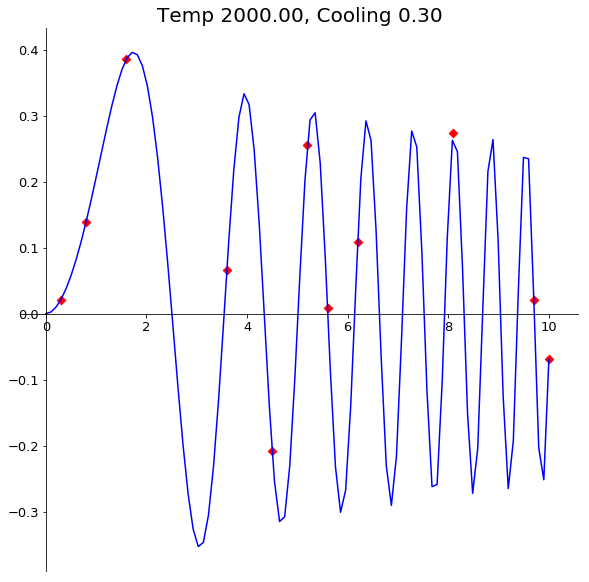

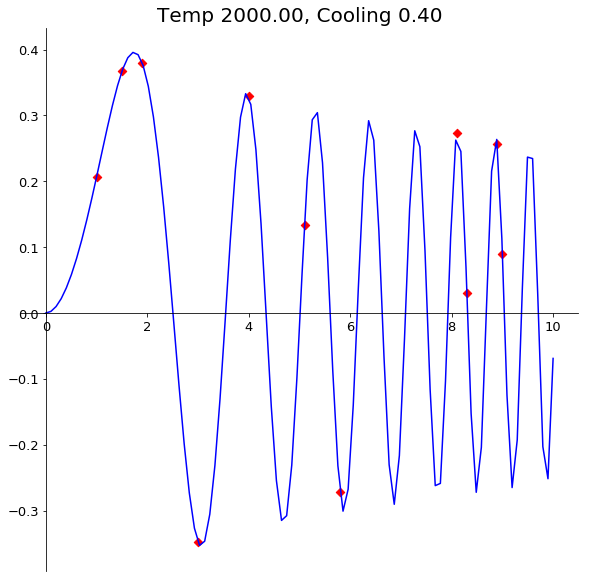

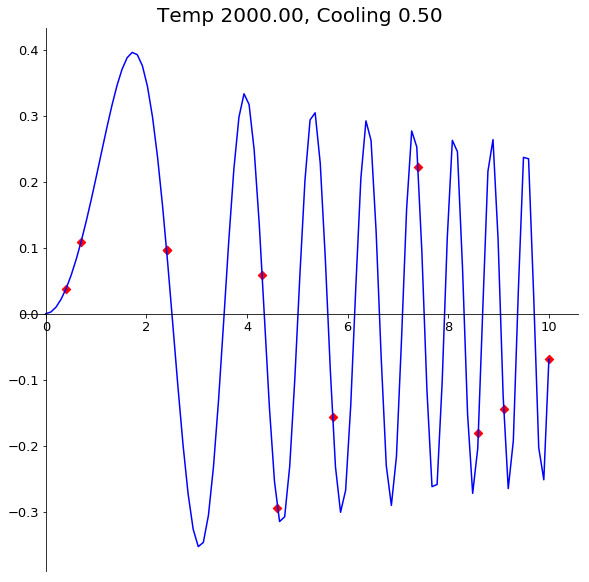

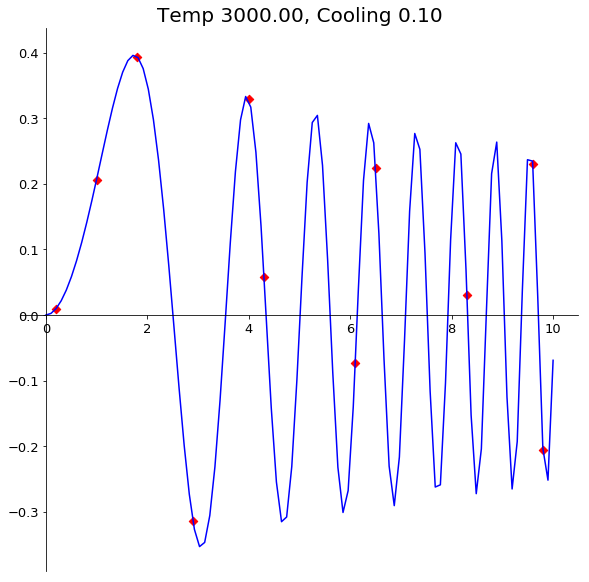

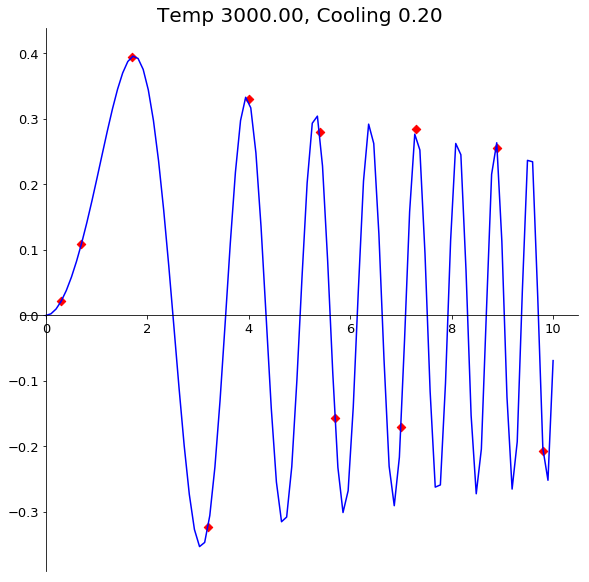

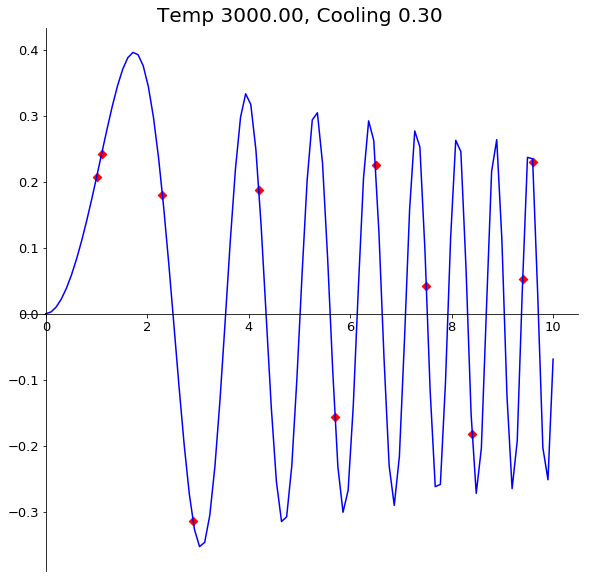

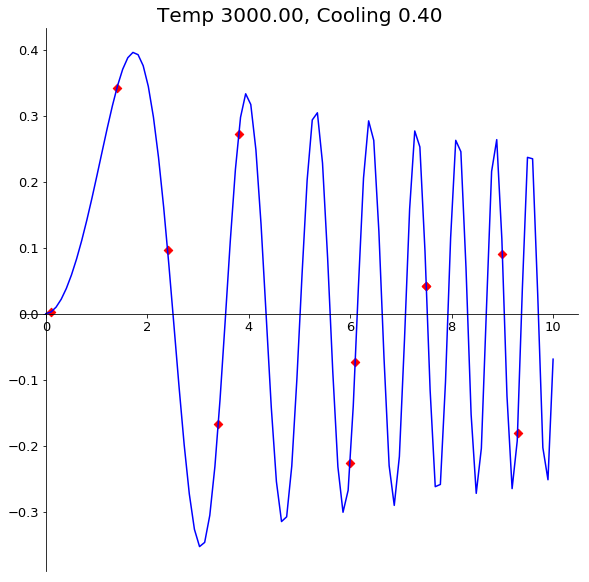

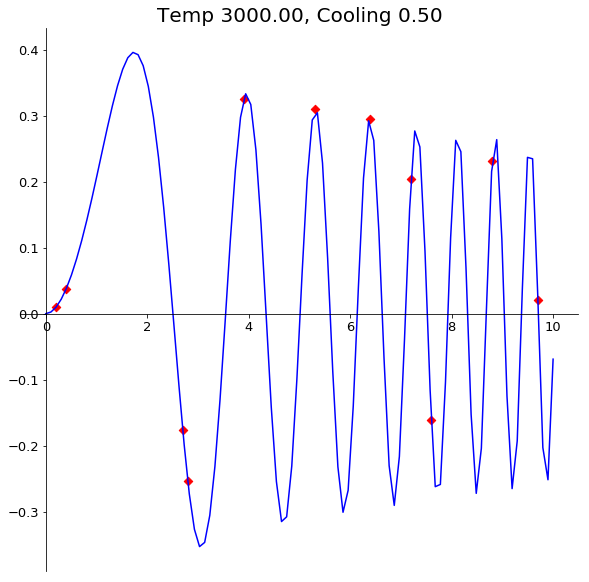

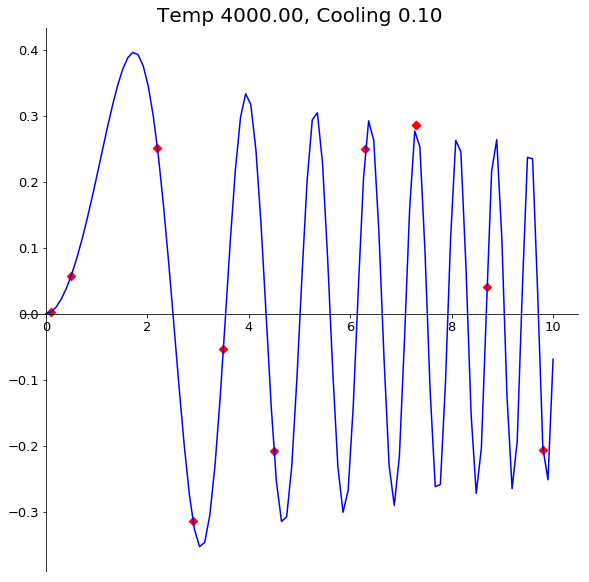

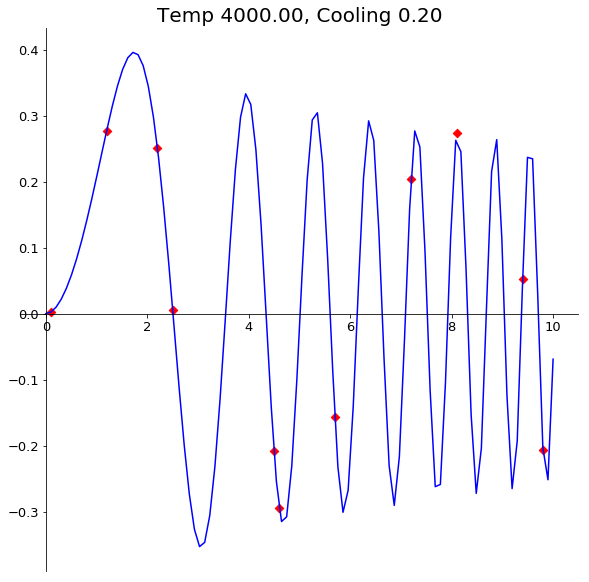

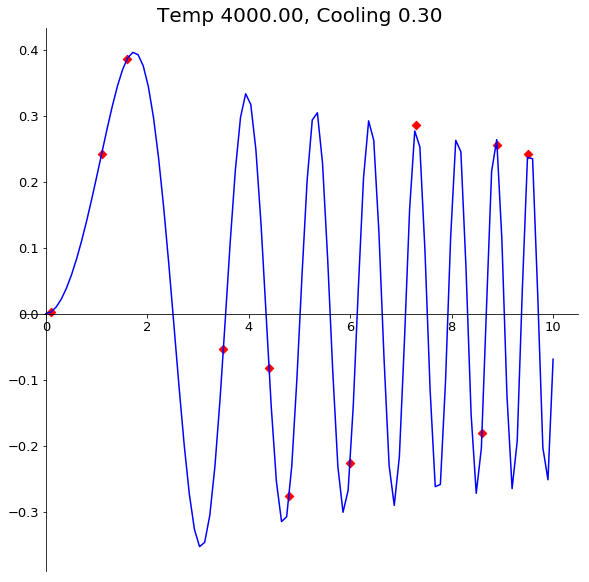

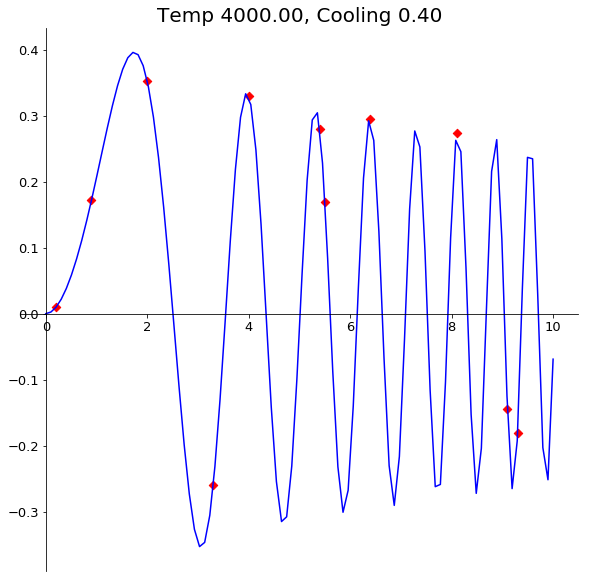

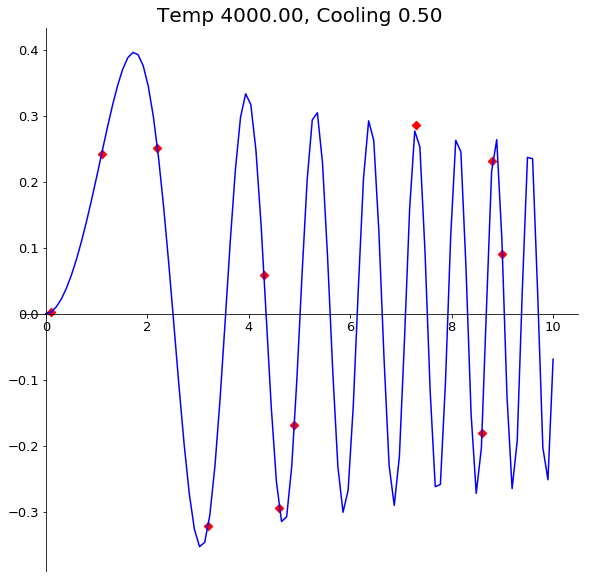

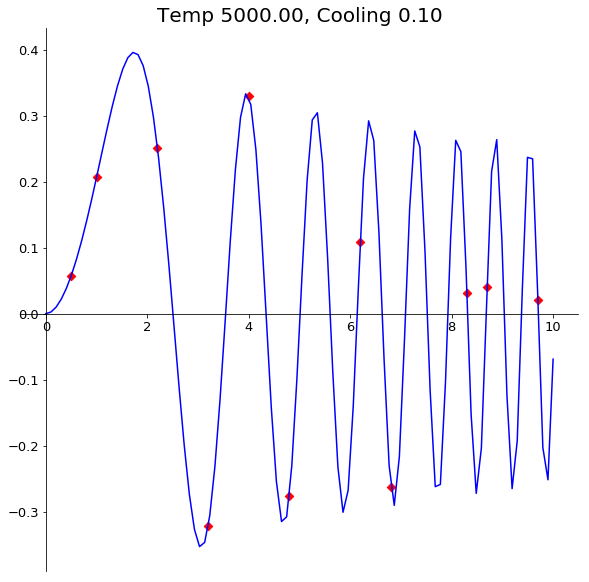

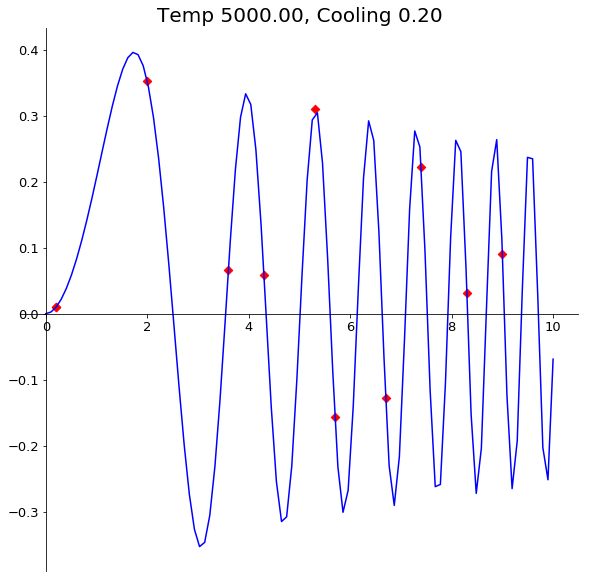

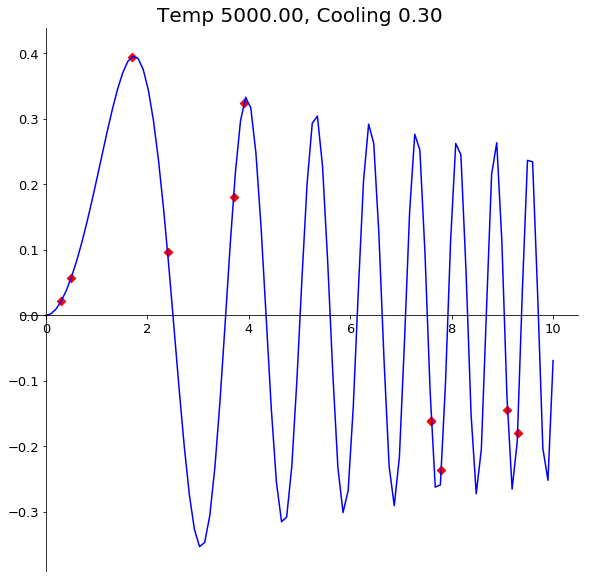

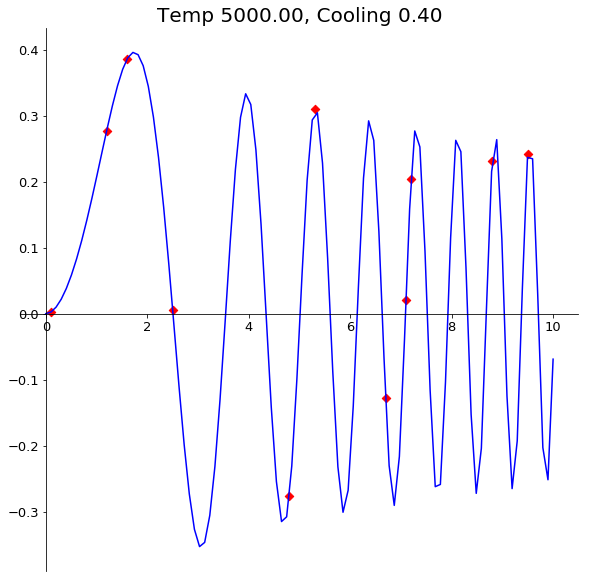

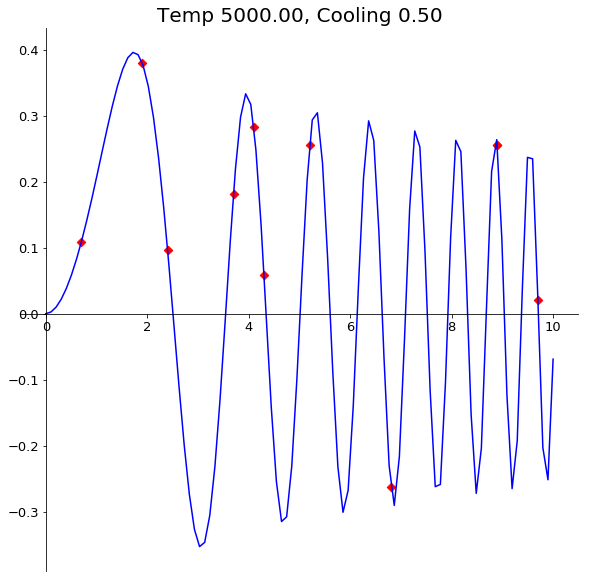

In [6]:
import random

def sim_annealing(x_0, step, T, cooling_coef):
    curr_x = x_0
    iterations = 0
    
    while True:
        if float('{:.3f}'.format(T)) <= 0: break
        
        left_x  = curr_x - step
        right_x = curr_x + step
        
        left_e = Y(left_x)
        right_e = Y(right_x)
        
        # choose the next direction keeping into consideration domain limits
        if left_x <= MIN_X:
            next_x, next_e = (right_x, right_e)
        elif right_x >= MAX_X:
            next_x, next_e = (left_x, left_e)
        else:    
            direction = random.choice(['left', 'right'])
            next_x, next_e = (left_x, left_e) if direction == 'left' else (right_x, right_e)
          
        curr_e = Y(curr_x)
        delta_e = curr_e - next_e
        if delta_e > 0:
            curr_x = next_x
        else:
            if random.random() < (math.exp(-(delta_e) / T)):
                curr_x = next_x
            T *= cooling_coef
            
        iterations += 1
            
    return curr_x, Y(curr_x), iterations

temperatures  = np.linspace(1000,5000, 5)
cooling_coefs = np.linspace(0.1, 0.5, 5)

iters = []
with open('./Output/Q3b.txt', 'w') as f:
    for t in temperatures:
        f.write('\n\n---- T: {:.0f} ----\n'.format(t))
        avg_iters = []
        for c in cooling_coefs:
            f.write('\n\n---- Cooling Coeff: {:.2f} ----\n'.format(c))
            xs, es, iterations = [], [], []
            for x_0 in init_x:
                x, e, i = sim_annealing(x_0, optimal_step, t, c)
                xs.append(x)
                es.append(e)
                iterations.append(i)
                f.write('Initial X = {:.0f}\tFinal (X,Y) = ({:.2f},{:.2f})\tIterations: {}\n'.format(x_0,x,e,i))

            # plot the new location of eacth agent
            plot_model(x_axis, y_model, xs, es, 'Temp {:.2f}, Cooling {:.2f}'.format(t,c))
            avg_i = sum(iterations) / len(iterations)
            avg_iters.append(avg_i)
            f.write('Average iterations to converge: {:.1f}\n'.format(avg_i))

        iters.append(avg_iters)



It is easier to visualize the changes in number of iterations to converge with the following graph:

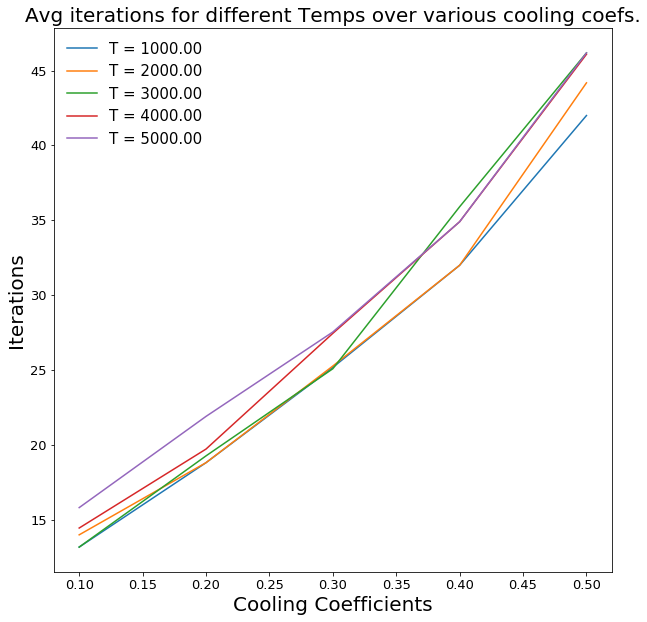

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
for idx, t in enumerate(iters):
    ax.plot(cooling_coefs, t, label='T = {:.2f}'.format(temperatures[idx]))
    
plt.title('Avg iterations for different Temps over various cooling coefs.', fontsize=20)
plt.xlabel('Cooling Coefficients', fontsize=20)
plt.ylabel('Iterations', fontsize=20)
plt.legend(loc='best', prop={'size':15}, frameon=False)

fig.savefig('./Figures/fig_{}.png'.format(increment_counter()))

plt.show()

Note that if we had let the algorithm run until it found a neighbour wiht smaller Energy as the current node (i.e. Hill Climbing) after T = 0, All the points would have ended in a local maxima. 

An example of such algorithm is presented next:

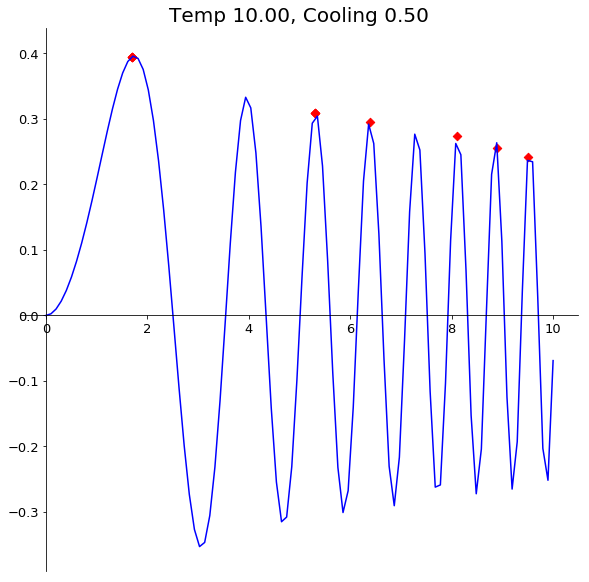

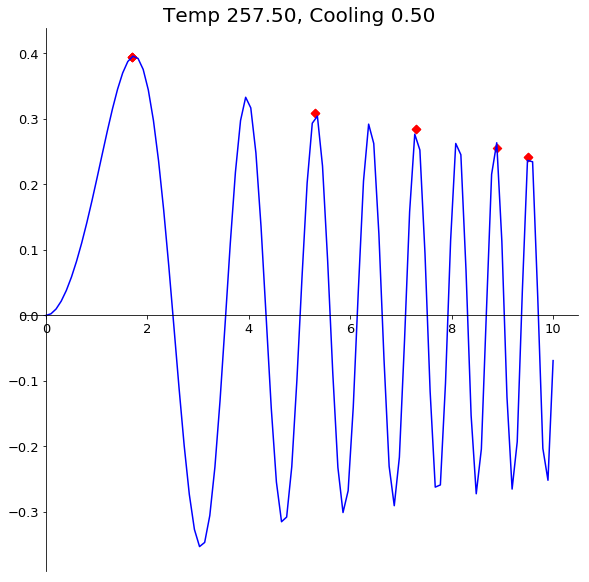

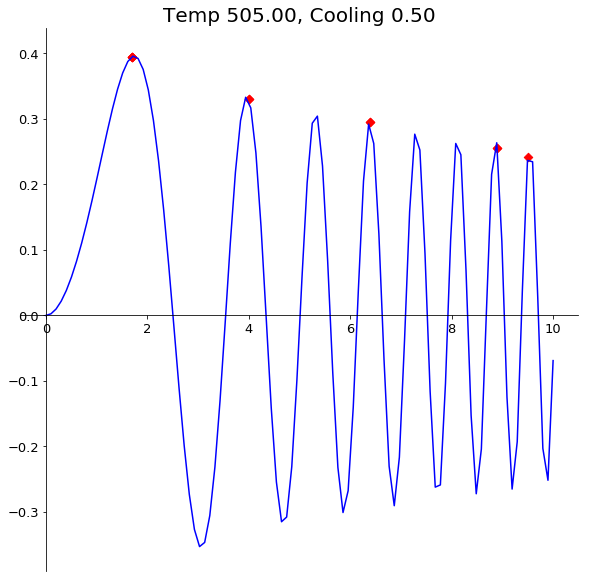

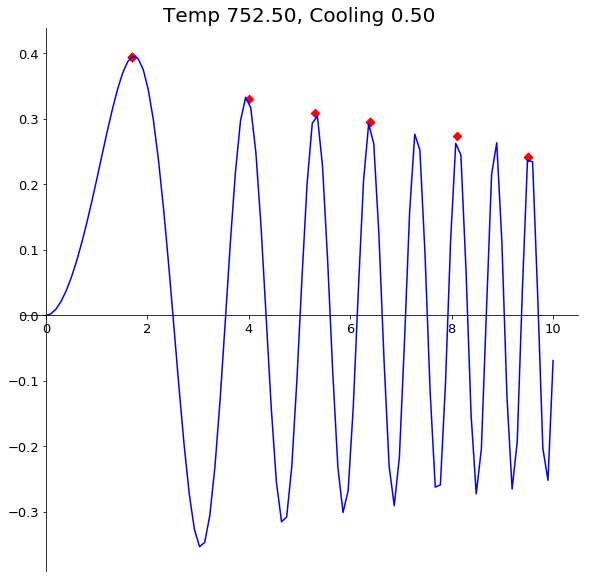

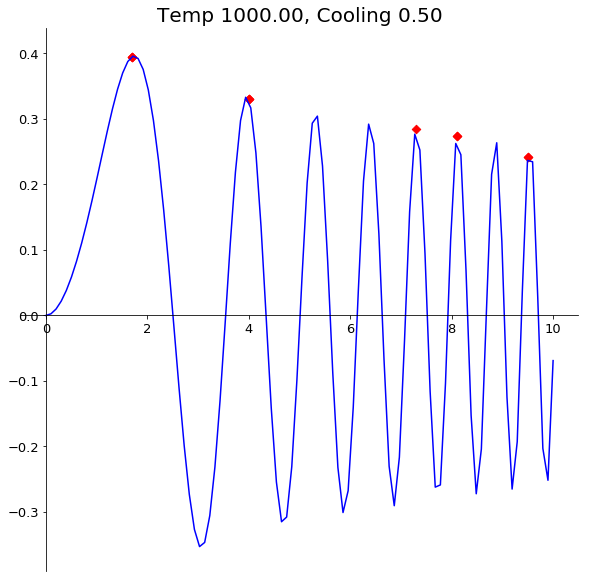

In [8]:
import random

def sim_annealing(x_0, step, T, cooling_coef):
    curr_x = x_0
    iterations = 0
    
    while True:
        left_x  = curr_x - step
        right_x = curr_x + step
        
        left_e = Y(left_x)
        right_e = Y(right_x)
        
        # choose the next direction keeping into consideration domain limits
        if left_x <= MIN_X:
            next_x, next_e = (right_x, right_e)
        elif right_x >= MAX_X:
            next_x, next_e = (left_x, left_e)
        elif float('{:.3f}'.format(T)) > 0:     
            direction = random.choice(['left', 'right'])
            next_x, next_e = (left_x, left_e) if direction == 'left' else (right_x, right_e)
        else:
            next_x, next_e = (left_x, left_e) if left_e > right_e else (right_x, right_e)
          
        curr_e = Y(curr_x)
        delta_e = curr_e - next_e
        if float('{:.3f}'.format(T)) > 0:
            if delta_e > 0:
                curr_x = next_x
            else:
                if random.random() < (math.exp(-(delta_e) / T)):
                    curr_x = next_x
                T *= cooling_coef
        elif curr_e < next_e: 
            curr_x = next_x
        else:
            break
            
        iterations += 1
            
    return curr_x, Y(curr_x), iterations

temperatures  = np.linspace(10, 1000, 5)
cooling_coefs = np.linspace(0.5, 0.5, 1)

iters = []
for t in temperatures:
    avg_iters = []
    for c in cooling_coefs:
        xs, es, iterations = [], [], []
        for x_0 in init_x:
            x, e, i = sim_annealing(x_0, optimal_step, t, c)
            xs.append(x)
            es.append(e)
            iterations.append(i)

        # plot the new location of eacth agent
        plot_model(x_axis, y_model, xs, es, 'Temp {:.2f}, Cooling {:.2f}'.format(t,c))

